In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X= df.drop('label', axis=1)
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [4]:
y= df['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [5]:
df.shape

(20800, 5)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer



In [7]:
df= df.dropna()

In [8]:
messages = df.copy()

In [9]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
stemmer= PorterStemmer()

corpus=[]
for i in range(0, len(messages)):
    review= re.sub('[^A-Za-z]', ' ', messages['title'][i])
    review= review.lower()
    review= review.split()
    review= [stemmer.stem(words) for words in review if words not in stopwords.words('english')]
    review= ' '.join(review)
    corpus.append(review)
# print(corpus)
    
    
 

In [12]:
#Applying Count Vectorizer
#Creating Bag of Words Model

cv= CountVectorizer(max_features=5000, ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [13]:
X.shape

(18285, 5000)

In [14]:
y = messages['label']

In [15]:
#Divide the dataset into train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33, random_state=0)

In [16]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [17]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [18]:
count_df= pd.DataFrame(X_train, columns= cv.get_feature_names_out())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# MULTINOMIALNB ALGORITHM

In [19]:
from sklearn.naive_bayes import MultinomialNB
cls= MultinomialNB()

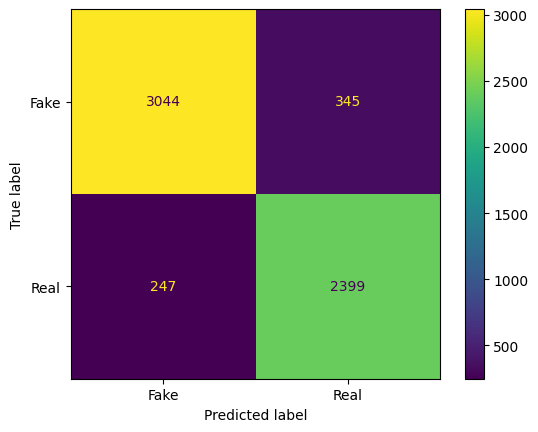

0.9019055509527755


In [20]:
cls.fit(X_train, y_train)
y_pred= cls.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','Real'])
disp.plot()
plt.show()

score= accuracy_score(y_pred, y_test)
print(score)


## Passive Aggressive Classifier Algorithm # This also works very very fine with text data

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf=PassiveAggressiveClassifier()

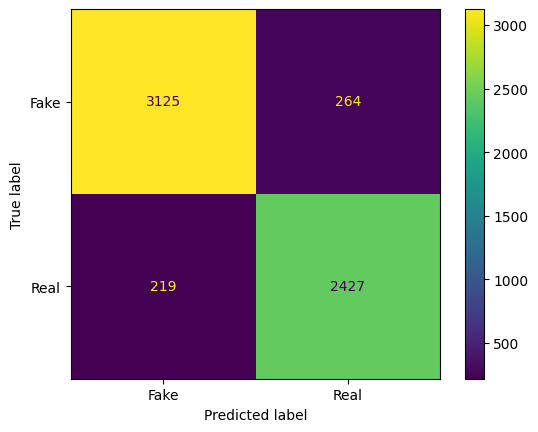

0.91996685998343


In [22]:
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','Real'])
disp.plot()
plt.show()

score= accuracy_score(y_pred, y_test)
print(score)

### MULTINOMIAL CLASSIFIER WITH HYERPARAMETER

In [23]:
clf= MultinomialNB(alpha=0.1)


In [24]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_clf= MultinomialNB(alpha=alpha)
    sub_clf.fit(X_train, y_train)
    y_pred= sub_clf.predict(X_test)
    score= accuracy_score(y_pred, y_test)
    print("Alpha: {}, Score: {}".format(alpha, score))
    if score> previous_score:
        previous_score=score
        clf= sub_clf
    
print(clf)

c:\program files\python38\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.8903065451532726
Alpha: 0.1, Score: 0.9020712510356255
Alpha: 0.2, Score: 0.9025683512841757
Alpha: 0.30000000000000004, Score: 0.9024026512013256
Alpha: 0.4, Score: 0.9017398508699255
Alpha: 0.5, Score: 0.9015741507870754
Alpha: 0.6000000000000001, Score: 0.9022369511184756
Alpha: 0.7000000000000001, Score: 0.9025683512841757
Alpha: 0.8, Score: 0.9015741507870754
Alpha: 0.9, Score: 0.9017398508699255
MultinomialNB(alpha=0.2)


In [25]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_clf= MultinomialNB(alpha=alpha)
    sub_clf.fit(X_train, y_train)
    y_pred= sub_clf.predict(X_test)
    score= accuracy_score(y_pred, y_test)
    print("Alpha: {}, Score: {}".format(alpha, score))
    if score> previous_score:
        previous_score=score
        clf= sub_clf
    
print(clf)

print("Feature Log Probabilities:")
print(feature_log_probs)

c:\program files\python38\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.8903065451532726
Alpha: 0.1, Score: 0.9020712510356255
Alpha: 0.2, Score: 0.9025683512841757
Alpha: 0.30000000000000004, Score: 0.9024026512013256
Alpha: 0.4, Score: 0.9017398508699255
Alpha: 0.5, Score: 0.9015741507870754
Alpha: 0.6000000000000001, Score: 0.9022369511184756
Alpha: 0.7000000000000001, Score: 0.9025683512841757
Alpha: 0.8, Score: 0.9015741507870754
Alpha: 0.9, Score: 0.9017398508699255
MultinomialNB(alpha=0.2)
Feature Log Probabilities:


NameError: name 'feature_log_probs' is not defined

In [ ]:
feature_log_probs = clf.feature_log_prob_
feature_log_probs


# Higher Probabilities in "Class 0": Features with higher probabilities in the "fake" class (Class 0) are more indicative of "fake" news.
# Higher Probabilities in "Class 1": Features with higher probabilities in the "real" class (Class 1) are more indicative of "real" news.


In [ ]:
##the most negative value is the most fakest word

'''In a binary classification problem, like the one you're working on (fake vs. real news), 
the feature_log_prob_ attribute of a Naive Bayes classifier only has two rows, 
irrespective of the number of data points (rows) in your dataset. 
This is because there are two classes and, therefore, two sets of probabilities being calculated: one for each class.'''


In [ ]:
#Most real in 1st row
sorted(zip(clf.feature_log_prob_[0], feature_name),reverse=True)[:20]  #yeh sirf 1st row mein konsa important feature hai wahi batayega

In [ ]:
#Most fake in 1st row

sorted(zip(clf.feature_log_prob_[0], feature_name))[:20]

In [ ]:
feature_names = cv.get_feature_names_out()  # Assuming cv is your CountVectorizer

# Iterate through each class's log probabilities
for class_idx, class_log_probs in enumerate(clf.feature_log_prob_):
    print(f"Class {class_idx} Most Important Features:")
    
    # Pair log probabilities with feature names and sort
    important_features = sorted(zip(class_log_probs, feature_names), reverse=True)[:20]
    
    # Print the important features for this class
    for log_prob, feature_name in important_features:
        print(f"Feature: {feature_name}, Log Probability: {log_prob:.4f}")
    
    print("\n")  # Add a newline for better readability



In [ ]:
num_classes = clf.feature_log_prob_.shape[0]
print("Number of Classes:", num_classes)